In [45]:
import pandas as  pd    
import seaborn as sns
import numpy as np
import plotly.express as px 
import openpyxl
import matplotlib.pyplot as plt

In [46]:
df_all=pd.read_csv('/Users/kalou/Documents/GitHub/rh-analysis/archive/df_all.csv')

DATA CLEANING & EXPLORATION
---
>

In [47]:
df_all.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingHours,AverageHoursPerDay,NumberOfDaysAbsent,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,0,0,102530,410.0,17,3,3,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,...,1,4,109189,437.0,13,2,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,...,0,3,101714,407.0,7,3,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,...,7,5,101316,405.0,14,2,3,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,...,0,4,117578,470.0,4,3,3,4.0,1.0,3.0


DEPARTMENT EXPLORATION
---
>

In [48]:
def Apercentage(df,column_names):
    results = {}
    for column_name in column_names:
        values = df[column_name].unique()
        for column_value in values:
            yes_counts = df[df[column_name] == column_value]['Attrition'].value_counts().get('Yes', 0)
            total_counts = df[df[column_name] == column_value]['Attrition'].count()
            percentage_of_attrition = yes_counts / total_counts * 100

            results[column_value] = percentage_of_attrition
    
    return results

NOMBRE D'EMPLOYEE PAR DEPARTEMENT

In [49]:
df_all['Department'].value_counts()

Department
Research & Development    2807
Sales                     1307
Human Resources            186
Name: count, dtype: int64

<Axes: ylabel='Department'>

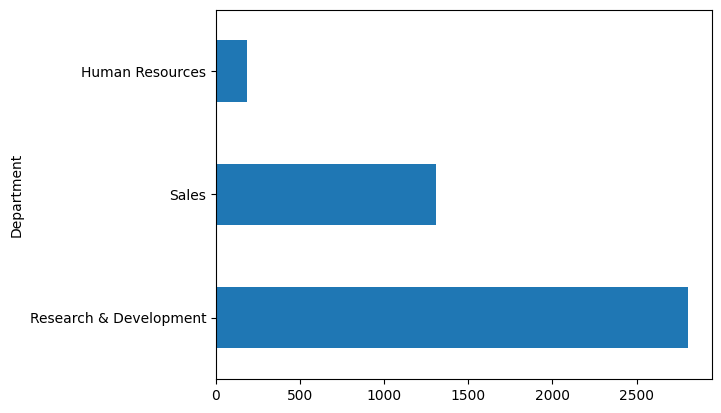

In [50]:
df_all['Department'].value_counts().plot(kind='barh')

In [51]:
yes_c=df_all['Attrition'].value_counts().get('Yes',0)
total=df_all['Attrition'].count()
Attrition_rate= yes_c/total * 100
Attrition_rate

16.162790697674417

ATTRITION RATE BY DEPARTMENT

In [52]:
Department = ['Department']
dep=Apercentage(df_all,Department)
dep

{'Sales': 15.14919663351186,
 'Research & Development': 15.781973637335234,
 'Human Resources': 29.03225806451613}

<Axes: >

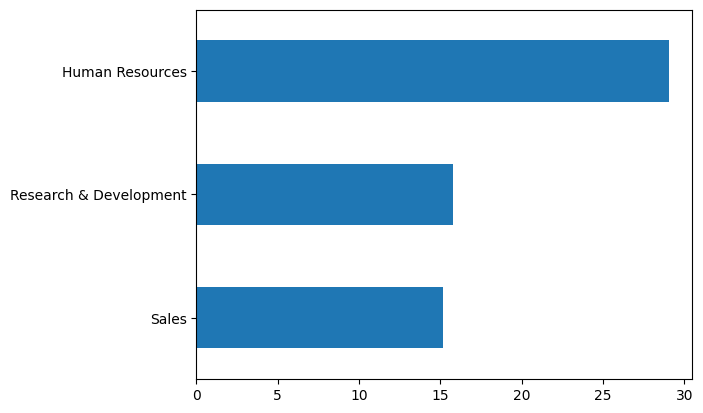

In [108]:
pd.Series(dep).plot(kind='barh')

HR ATTRITION RATE HIGHER THAN THE OTHERS. LET'S DIG INTO IT.

In [54]:
JobSatisfaction_by_Department=df_all.pivot_table(index=['Department'], values=['JobSatisfaction'], aggfunc='mean')
JobSatisfaction_by_Department

,JobSatisfaction
Department,
Human Resources,2.693548
Research & Development,2.703598
Sales,2.775057


<Axes: xlabel='Department'>

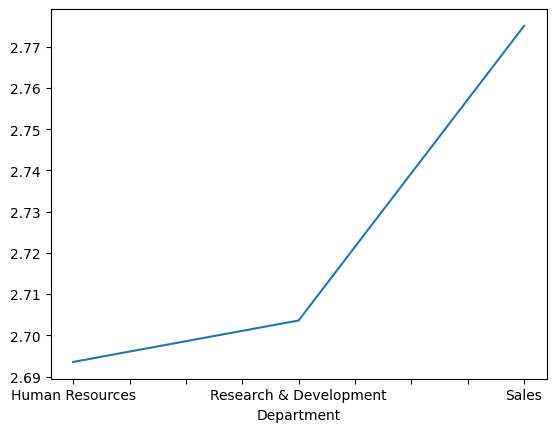

In [55]:
df_all.groupby('Department')['JobSatisfaction'].mean().plot()

AVG SALARY DIFFERENCE BY DEPARTMENT

<Axes: ylabel='Department'>

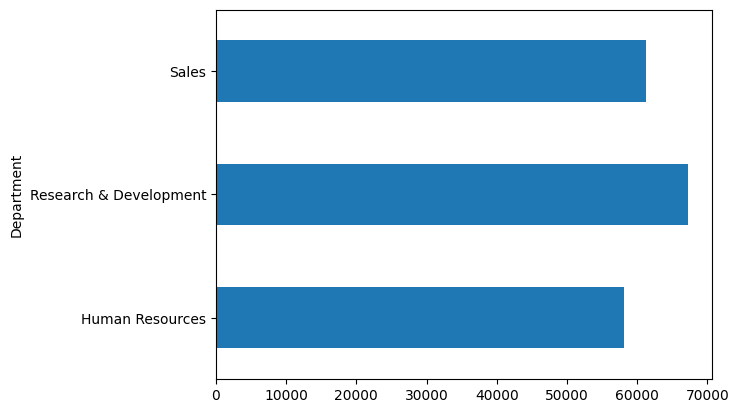

In [83]:
df_all.groupby('Department')['MonthlyIncome'].mean().plot(kind='barh')

AVG PERCENT SALARY HIKE BY DEPARTMENT

Text(0.5, 1.0, 'Mean Percent Salary Hike by Department')

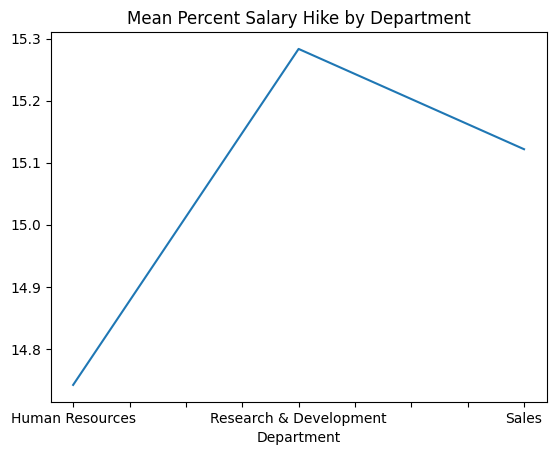

In [65]:
df_all.groupby('Department')['PercentSalaryHike'].mean().plot()
plt.title('Mean Percent Salary Hike by Department')


WE CAN SEE THAT THE LINE MIRROR THE ATTRITION RATE LINE

HOW LONG THEY STAY BEEN IN THE COMPANY

In [72]:
df_all.groupby('Department')['YearsAtCompany'].mean()

Department
Human Resources           5.704301
Research & Development    7.165657
Sales                     6.914308
Name: YearsAtCompany, dtype: float64

HR DEP EMPLOYEE ARE THE LATEST, LET'S GROUP THEM BY AGE

<Axes: xlabel='Department'>

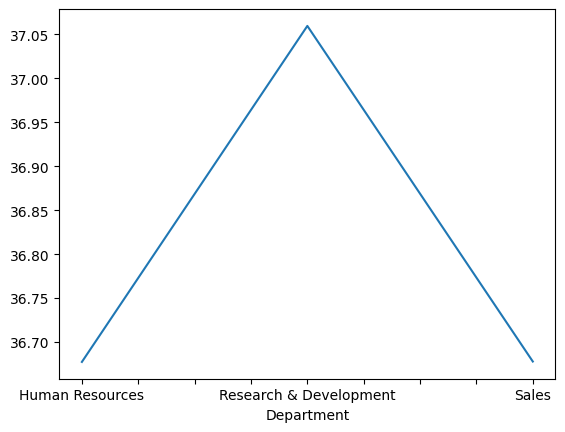

In [73]:
df_all.groupby('Department')['Age'].mean().plot()

In [74]:
df_all.groupby('Department')['Age'].mean()

Department
Human Resources           36.677419
Research & Development    37.059494
Sales                     36.677888
Name: Age, dtype: float64

THIS IS ALSO THE DEPARTMENT WITH THE YOUNGEST EMPLOYEE

In [75]:
df_all.groupby('Department')['NumCompaniesWorked'].mean()

Department
Human Resources           2.048387
Research & Development    2.778055
Sales                     2.592196
Name: NumCompaniesWorked, dtype: float64

HR DEP EMPLOYEE ARE AMONG THE YOUNGEST WITH SALES EMPLOYEE. 
HR DEP EMPLOYEE HAVE THE HIGHEST ATTRITION RATE,
THE LOWEST PERCENT SALARY HIKE AND ARE AMONG THE MOST RECENT TO GET INTO THIS COMPANY,
PROBABLY RECENTLY GRADUATE ACCORDING TO THE MEAN OF NUMBER COMPANIES WORKED ,
THEY ALSO HAVE THE LOWEST JOB SATISFACTION RATE,

YOUNG GRADUATE IN HR FIELD ARE LOOKING FOR QUICK PROMOTION AND EXPERIENCES MAYBE THE COMPANIE SHOULD PROPOSE FOR THE NEXT TALENT BASH SOME MORE ATTRACTIVE SALARY 

JOB ROLE EXPLORATION
---
>

MARITAL STATUS EXPLORATION
---
>

AGE GROUPS EXPLORATION
---
>

OVERTIME EXPLORATION
---
>

In [76]:
Overtime = df_all[df_all['AverageHoursPerDay'] > 480]
Overtime

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,YearsWithCurrManager,TotalWorkingHours,AverageHoursPerDay,NumberOfDaysAbsent,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,DurationInPosition
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,6,Female,4,...,7,153412,614.0,12,3,3,3.0,2.0,2.0,0
10,45,No,Travel_Rarely,Research & Development,17,2,Medical,11,Male,2,...,10,121406,486.0,8,2,3,3.0,4.0,3.0,16
11,55,No,Travel_Rarely,Research & Development,14,4,Life Sciences,13,Female,1,...,13,127702,511.0,20,3,3,4.0,1.0,3.0,32
12,47,Yes,Non-Travel,Research & Development,1,1,Medical,14,Male,1,...,9,132434,530.0,14,2,3,1.0,2.0,2.0,1
16,37,No,Non-Travel,Research & Development,1,3,Medical,18,Male,2,...,2,162469,650.0,3,3,3,1.0,4.0,3.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4281,52,No,Non-Travel,Research & Development,2,3,Technical Degree,4390,Male,1,...,12,133230,533.0,5,2,3,1.0,3.0,4.0,18
4283,32,Yes,Travel_Rarely,Sales,23,1,Life Sciences,4392,Male,3,...,2,150820,603.0,9,3,3,4.0,3.0,1.0,2
4292,45,No,Travel_Frequently,Sales,21,1,Marketing,4402,Male,3,...,2,121294,485.0,5,2,3,1.0,3.0,3.0,3
4296,42,No,Travel_Rarely,Research & Development,5,4,Medical,4406,Female,1,...,2,128538,514.0,6,3,3,4.0,1.0,3.0,3


<Axes: xlabel='Department'>

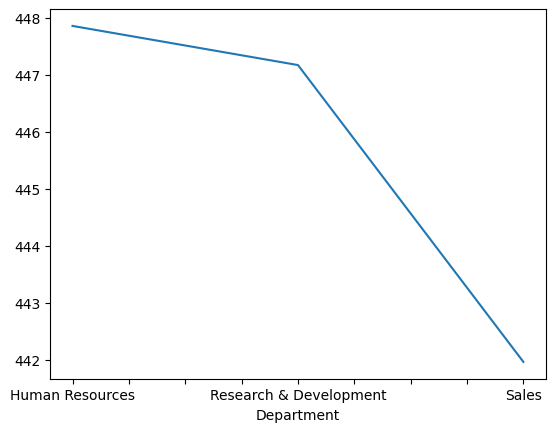

In [86]:
df_all.groupby('Department')['AverageHoursPerDay'].mean().plot()

<Axes: xlabel='Department'>

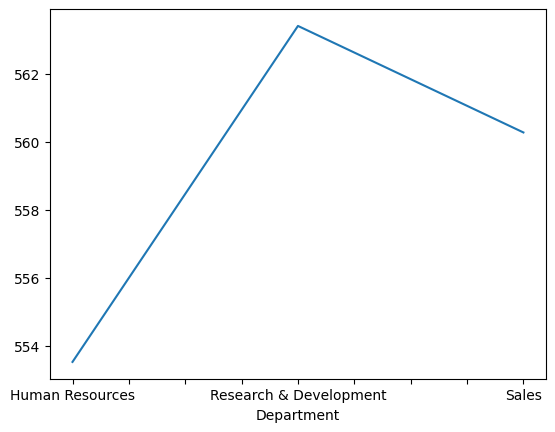

In [90]:
Overtime.groupby('Department')['AverageHoursPerDay'].mean().plot()

HR DEP HAVE THE HIGHEST AVG WORKING HOURS BUT SALES GOT THE HIGHEST AVG OVERTIME

ATTRITION RATE OVERTIMERS

In [77]:
yes_overtime=Overtime['Attrition'].value_counts().get('Yes',0)
total_overtime=Overtime['Attrition'].count()
Attrition_rate_overtimers= yes_overtime/total_overtime * 100
Attrition_rate_overtimers

29.497716894977167

ATTRITION RATE BY DEPARTMENT OVERTIMERS

In [78]:
Department = ['Department']
dep_o=Apercentage(Overtime,Department)
dep_o

{'Research & Development': 31.224209078404403,
 'Sales': 22.653721682847898,
 'Human Resources': 44.06779661016949}

<Axes: >

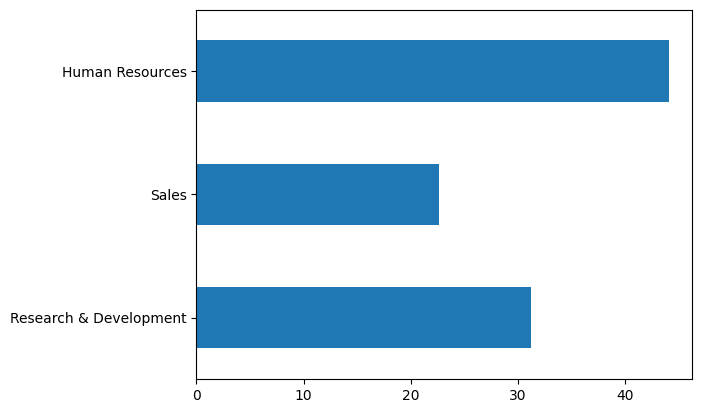

In [79]:
pd.Series(dep_o).plot(kind='barh')

JOB SATISFACTION BY DEPARTMENT IN OVERTIMERS CATEGORY

<Axes: xlabel='Department'>

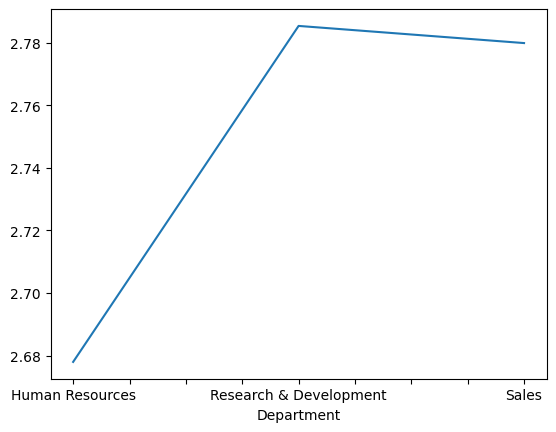

In [100]:
Overtime.groupby('Department')['JobSatisfaction'].mean().plot(kind='line')


<Axes: xlabel='Department'>

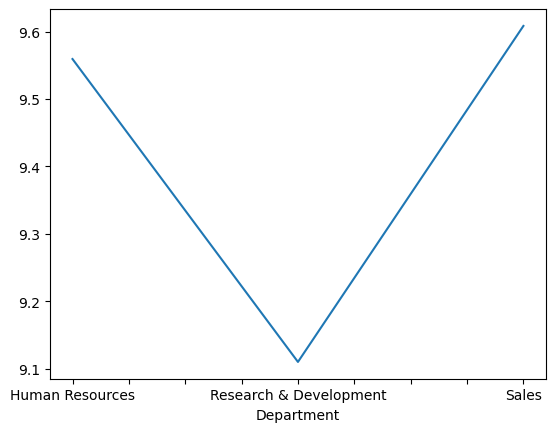

In [106]:
Overtime.groupby('Department')['DistanceFromHome'].mean().plot()
